In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plot


In [5]:
df = pd.DataFrame(pd.read_csv('superstore.csv'))
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156  08/11/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688  12/06/2016  16/06/2016    Second Class    DV-13045   
3       4  US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   
4       5  US-2015-108966  11/10/2015  18/10/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
'''
Lo primero raro es que hay una columna llamada Row ID y a su izquierda a una columna sin nombre que tiene una enumeración.
Dentro del archivo original, el Row ID es la columna indice, pero Pandas no detecta esto y la crea por cada registro (fila) que exista en el Data Frame.
Para evitar que se duplique usamos el siguiente comando:
'''
df = df.set_index('Row ID')

In [7]:
'''
Datos en el Data Frame
Usamos el comando:
'''
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
'''
Veremos que la mayoria de las columnas tienen a su derecha un nombre, la mayoria son object y eso está mal, pues tenemos valores numericos, 
de fecha, numeros enteros y flotantes.
Para acomodar esto usamos:
'''
df = df.convert_dtypes()
df.dtypes

Order ID         string[python]
Order Date       string[python]
Ship Date        string[python]
Ship Mode        string[python]
Customer ID      string[python]
Customer Name    string[python]
Segment          string[python]
Country          string[python]
City             string[python]
State            string[python]
Postal Code               Int64
Region           string[python]
Product ID       string[python]
Category         string[python]
Sub-Category     string[python]
Product Name     string[python]
Sales                   Float64
Quantity                  Int64
Discount                Float64
Profit                  Float64
dtype: object

In [9]:
'''
Esto hará una conversión aproximada a los tipos de datos que tenemos. Si volvemos a usar df.dtypes ahora el resultado será distinto.
Sin embargo 'Order Date' y 'Ship Date' todavía no tiene el tipo de dato correcto.
Estos son datos datetime arreglamos esto rapido usando:
'''
df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    dayfirst=True,
    errors='coerce'
)

df['Ship Date'] = pd.to_datetime(
    df['Ship Date'],
    dayfirst=True,
    errors='coerce'
)

Agrupando y graficando

In [10]:
'''
Pregunta 1: ¿Cuál es la categoría de productos más vendida?
Esto se responde de una manera sencilla. Tenemos que ver el total de registros que en su columna Category tengan el nombre de alguna categoria. 
En otras palabras ver cuantas veces se repite esa categoria en el total de registros.

Eso lo obtenemos usando:
'''
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: Int64

'\ncon plot() llamamos a la librería de matplotlib.pyplot para graficar. y en su paramero kind le indicamos el tipo de grafica. En este caso “bar”. fontsize para determinar el tamaño de la letra. color para darle colores distintos a cada barra. figsize para cambiar el tamaño de la figura.\nplot.xticks(rotation=45) permite hacer que los nombres de las etiquetas en el eje de las X roten 45 grados.\nplot.xlabel(Categorias) para darle nombre al eje X\nplot.ylabel(Cantidad de ventas) para darle nombre al eje Y\nplot.title(Categorias más vendidas) para darle titulo a la grafica\nplot.grid(axis=y) para mostrar la grilla en el eje de las Y\nplot.savefig(nombre-imagen.formato) nos permite guardar esa grafica como imagen.\n'

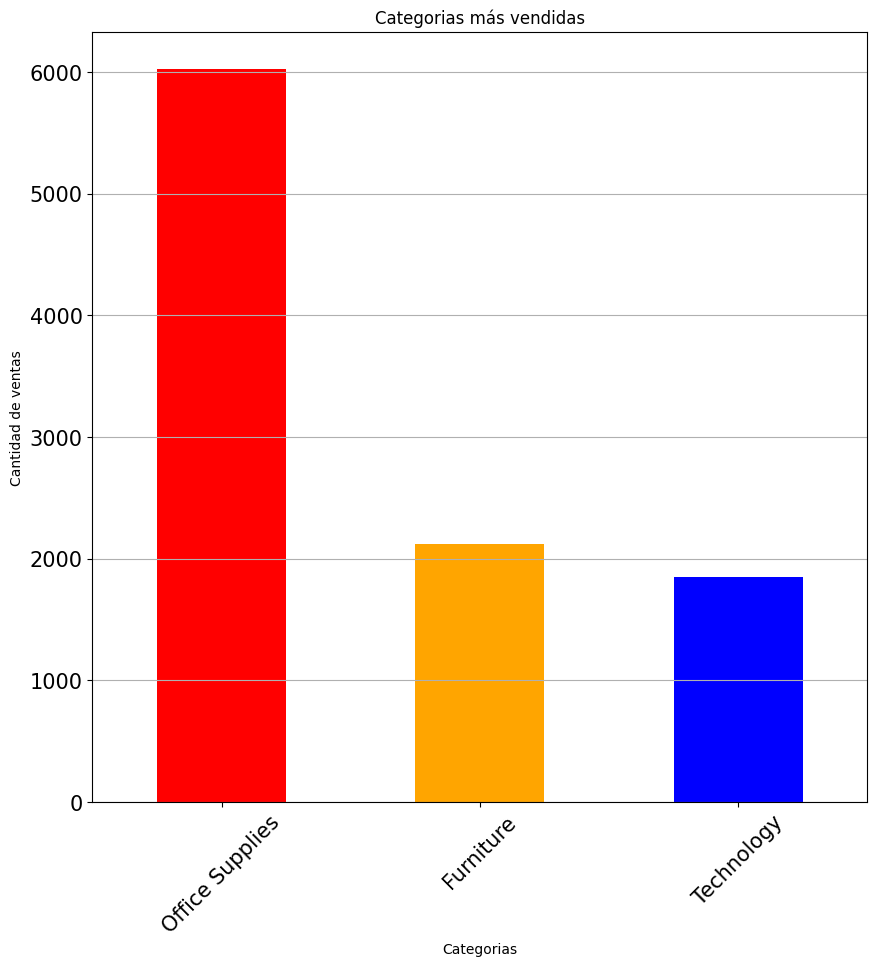

In [11]:
'''Graficamos los resultados'''

df['Category'].value_counts().plot(kind="bar", fontsize = 15, color=['red', 'orange', 'blue'], figsize=(10,10))
plot.xticks(rotation = 45)
plot.xlabel('Categorias')
plot.ylabel('Cantidad de ventas')
plot.title('Categorias más vendidas')
plot.grid(axis='y')
plot.savefig('cat-sold.png')
'''
con plot() llamamos a la librería de matplotlib.pyplot para graficar. y en su paramero kind le indicamos el tipo de grafica. En este caso “bar”. fontsize para determinar el tamaño de la letra. color para darle colores distintos a cada barra. figsize para cambiar el tamaño de la figura.
plot.xticks(rotation=45) permite hacer que los nombres de las etiquetas en el eje de las X roten 45 grados.
plot.xlabel(Categorias) para darle nombre al eje X
plot.ylabel(Cantidad de ventas) para darle nombre al eje Y
plot.title(Categorias más vendidas) para darle titulo a la grafica
plot.grid(axis=y) para mostrar la grilla en el eje de las Y
plot.savefig(nombre-imagen.formato) nos permite guardar esa grafica como imagen.
'''

"\n- usando groupby('Customer Name')['Sales'].sum() puedo agrupar los clientes en función a la suma (sum) de cuanto han gastado (‘Sales’)\n- luego usando .loc[cs > 12000] le digo que solo me muestre clientes que hayan gastado más de 12k. Esto debido a que hay muchos clientes \n    y nos importa los que gasten más\n- por ultimo le digo .sort_values() para que los ordene y uso plot(kind='barh') en este caso “barh” es para graficar barras horizontales.\n"

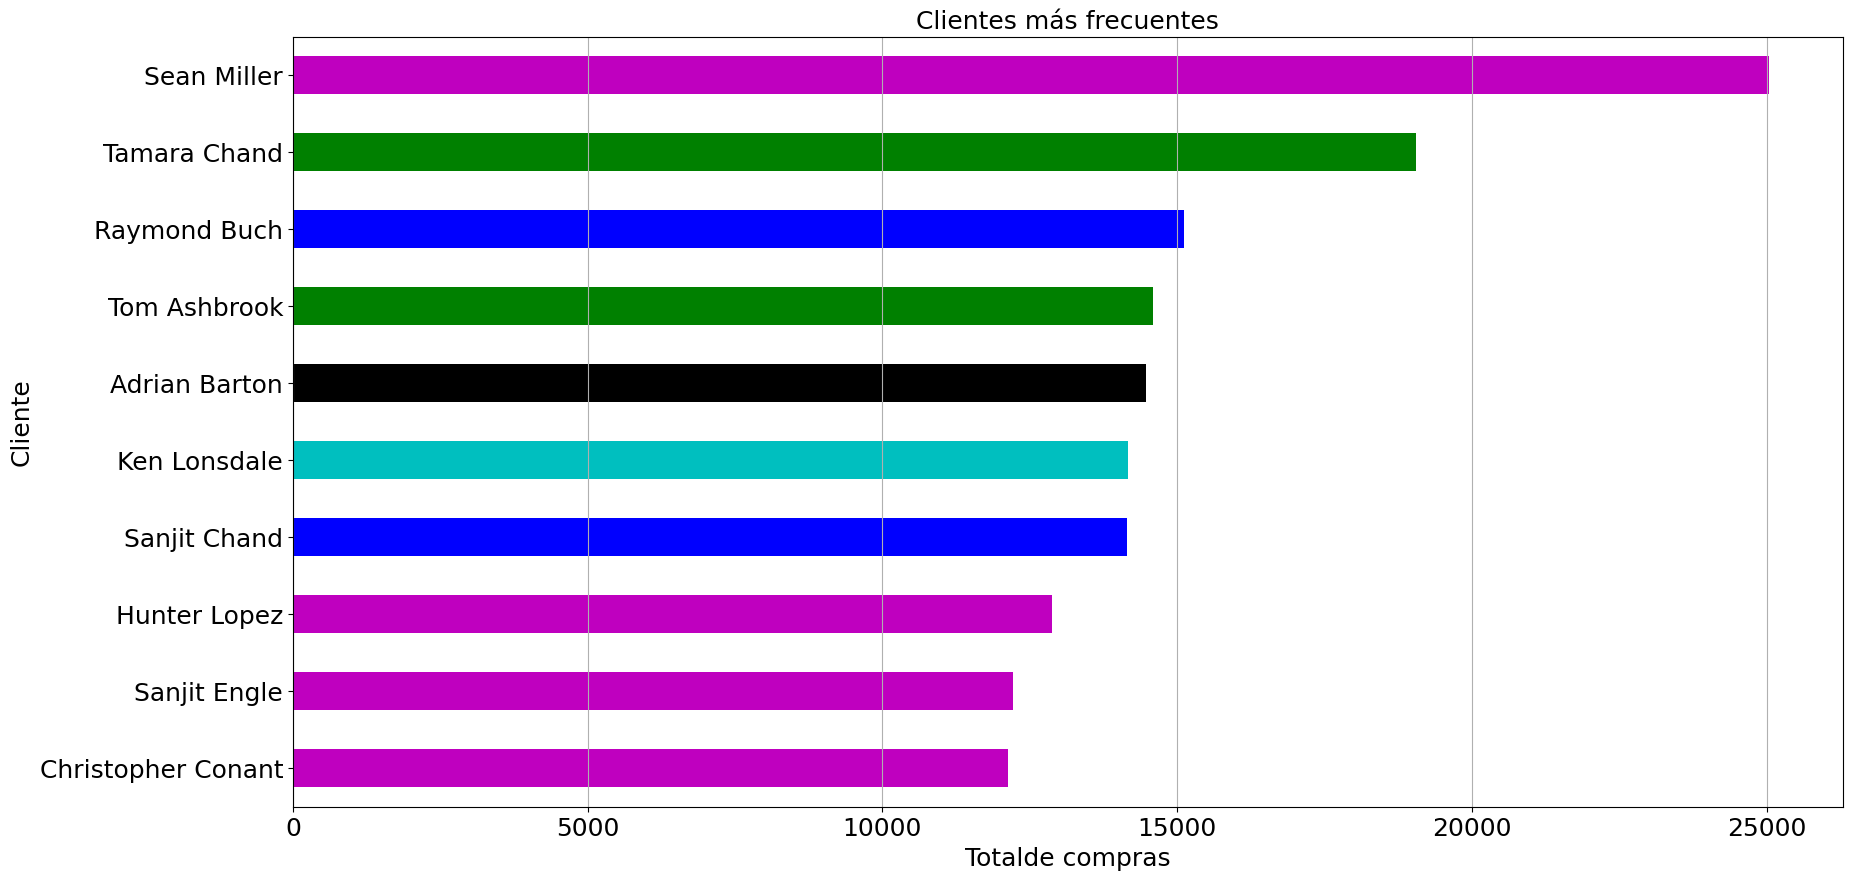

In [12]:
'''
Primera pregunta, resuelta.

Pregunta 2: ¿Quién es el cliente que compra más?
Esta pregunta se resuelve de dos formas.

Ubicar los clientes en función a cuanto gastan
Ubicar cuantas veces se repite el nombre del cliente en los registros para saber con que frecuencia compran.
En mi caso optaré por la 1 usando el siguiente codigo:
'''
def choice_color(pr):
    color_w = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    choice_c = []

    for i in pr:
        c = random.choice(color_w)
        choice_c.append(c)
    return choice_c

cs = df.groupby('Customer Name')['Sales'].sum()
pr = cs.loc[cs > 12000]
pr.sort_values().plot(kind='barh', figsize=(20,10), fontsize=18, color=choice_color(pr))
plot.grid(axis='x')
plot.title('Clientes más frecuentes', fontsize=18)
plot.ylabel('Cliente', fontsize=18)
plot.xlabel('Totalde compras', fontsize=18)
plot.savefig('customers.png')

'''
- usando groupby('Customer Name')['Sales'].sum() puedo agrupar los clientes en función a la suma (sum) de cuanto han gastado (‘Sales’)
- luego usando .loc[cs > 12000] le digo que solo me muestre clientes que hayan gastado más de 12k. Esto debido a que hay muchos clientes 
    y nos importa los que gasten más
- por ultimo le digo .sort_values() para que los ordene y uso plot(kind='barh') en este caso “barh” es para graficar barras horizontales.
'''

In [13]:
'''
Pregunta 3: ¿En qué Trimestre (Q) se realizan más ventas?</h3>
Para responder esta pregunta necesitamos 2 cosas

La fecha de la orden
La suma de las ventas
Para esto vamos a usar dos columnas y creamos un Data Frame a partir de dos columnas, usando:
'''
new_data = df[['Order Date', 'Sales']]

In [16]:
# print(new_data)
'''
Ahora que tenemos estos datos apartados, necesitamos quitar ese Row ID pues, lo que nos guiará para graficar esta información son los años, 
serán nuestros indices y nuestros valores en el eje X de la grafica.

Para eso usamos:
'''
new_data.set_index('Order Date', inplace=True)

In [18]:
print(new_data)
'''
usando inplace=True le decimos que cambie el indice y se guarde de una vez se ejecute el codigo.
Si vuelves a usar new_data verás que ya el Row ID no existe y ahora nuestro indice son las fechas de cada transacción.
Pero ahora solo queremos saber en que año fue y en que trimestre del año pasó un conjunto de transacciones. 
Para esto debemos crear dos columnas, una que nuestros muestre el año y otros que no muestre el trimestre de ese año.

Usamos
'''
new_data['freq'] = new_data.index.quarter
new_data['year'] = new_data.index.year

               Sales
Order Date          
2016-11-08    261.96
2016-11-08    731.94
2016-06-12     14.62
2015-10-11  957.5775
2015-10-11    22.368
...              ...
2014-01-21    25.248
2017-02-26     91.96
2017-02-26   258.576
2017-02-26      29.6
2017-05-04    243.16

[9994 rows x 1 columns]


C:\Users\edgar\AppData\Local\Temp\ipykernel_4828\3685976262.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['freq'] = new_data.index.quarter
C:\Users\edgar\AppData\Local\Temp\ipykernel_4828\3685976262.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['year'] = new_data.index.year


In [24]:
# print(new_data)
'''
donde freq son los trimestres (Q) del año.
Si ejecutamos new_dataotra vez, verás que tenemos dos columnas nuevas.
Ahora tenemos un nuevo reto:
Nuestros indices deben ser los años.
Nuestras columnas deben ser los trimestres (freq)
Los valores de cada Filax*Columna debe ser el TOTAL de transacciones ocurridas durante ese año Y trimestre
Para lograr esto debemos hacer una transformación, en Pandas llamado Pivot. Usaremos lo siguiente:
'''
pivot = pd.pivot_table(
    new_data,
    index='year',
    values='Sales',
    aggfunc='count',
    columns='freq'
)

Donde:

- **`new_data`** hace referencia a la tabla (**DataFrame**) que le haremos **Pivot**.
- **`index='year'`** indica cuáles serán nuestros nuevos **índices**.
- **`values='Sales'`** especifica cuáles serán los **valores** de las **Filas x Columnas**.
- **`aggfunc='count'`** se usa para tener el **conteo** de las transacciones. Si no lo especificamos, por defecto usará `'mean'`, es decir, nos calculará la **media**.
- **`columns='freq'`** señala cuáles serán nuestras nuevas **columnas**.


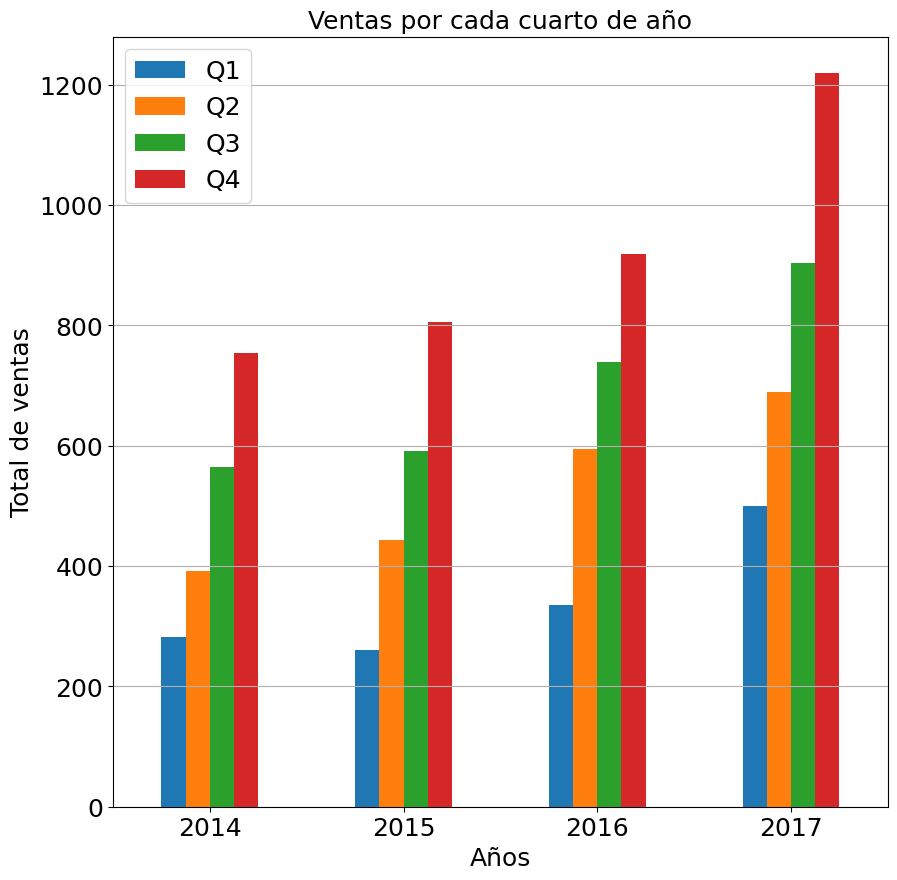

In [25]:
'''
Ahora si llamamos a pivot veremos la mágia lista.

Por ultimo nos queda graficar para ver que ha pasado de manera visual. Usamos:
'''
pivot.plot(kind='bar', figsize=(10,10), fontsize=18)
plot.xlabel('Años', fontsize=18)
plot.ylabel('Total de ventas', fontsize=18)
plot.title('Ventas por cada cuarto de año', fontsize=18)
plot.legend(labels=['Q1', 'Q2', 'Q3', 'Q4'], fontsize=18)
plot.xticks(rotation=0)
plot.grid(axis='y')
plot.savefig('solds-per-q.png')